# Business Problem 3

Determine the value of new customers

In [39]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics

In [40]:
# Get reference to Data
df = pd.read_csv('Customer_purchase.csv', encoding = 'latin1')
df.head()

,Cust_ID,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,CLV
0,5000,125,100,200,100,115,100,100,100,11520
1,5001,150,150,250,200,115,200,125,200,13085
2,5002,75,50,75,215,75,50,50,50,4333
3,5003,100,200,200,100,150,250,100,150,10586
4,5004,300,200,300,350,300,350,350,300,15200


In [41]:
df.describe()

,Cust_ID,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,CLV
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5049.500000,138.550000,141.850000,140.600000,165.400000,145.420000,148.050000,137.950000,133.150000,9207.080000
std,29.011492,59.942291,61.757325,58.600169,76.612893,61.558575,68.286736,62.551373,60.128881,2588.425346
min,5000.000000,25.000000,35.000000,50.000000,50.000000,35.000000,50.000000,25.000000,50.000000,3000.000000
25%,5024.750000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,7469.250000
50%,5049.500000,115.000000,125.000000,115.000000,150.000000,150.000000,137.500000,125.000000,112.500000,9225.000000
75%,5074.250000,157.500000,196.250000,170.000000,200.000000,177.500000,200.000000,150.000000,150.000000,10697.000000
max,5099.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,16489.000000


# Q1. Which months - CLV
Which months show a strong correlation to the target variable Customer Lifetime Value (CLV)

In [42]:
# Check for missing values
df.isnull().values.any()

False

In [43]:
# Understand what type of data is in this file
df.dtypes

Cust_ID    int64
Jan        int64
Feb        int64
Mar        int64
Apr        int64
May        int64
Jun        int64
Jul        int64
Aug        int64
CLV        int64
dtype: object

In [44]:
# Drop the customer ID - (axis = 1) to make the columns the data record source
cleaned_data = df.drop("Cust_ID", axis = 1)
cleaned_data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,CLV
0,125,100,200,100,115,100,100,100,11520
1,150,150,250,200,115,200,125,200,13085
2,75,50,75,215,75,50,50,50,4333
3,100,200,200,100,150,250,100,150,10586
4,300,200,300,350,300,350,350,300,15200


In [45]:
# Show which months have a strong correlation to CLV
cleaned_data.corr().CLV

Jan    0.704385
Feb    0.583947
Mar    0.776943
Apr    0.665698
May    0.640969
Jun    0.770068
Jul    0.781669
Aug    0.827148
CLV    1.000000
Name: CLV, dtype: float64

# Months with a strong correlation
1. Aug
2. Jul
3. Mar
4. Jun

# Q2. Model to predict CLV for new customers

In [46]:
# Slit the data into training & testing datasets (8:2 ratio)
predictors = cleaned_data.drop("CLV", axis = 1)
targets = cleaned_data.CLV

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size = .2)

print ("Predictor - Training: ", pred_train.shape, "Predictor - Testing: ", pred_test.shape)

Predictor - Training:  (80, 8) Predictor - Testing:  (20, 8)


In [47]:
# Build model based on training data
model = LinearRegression()
model.fit(pred_train, tar_train)

print ("Coefficients: \n", model.coef_)
print ("\nIntercept:\n", model.intercept_)

# Test model on testing data
predictions = model.predict(pred_test)

accuracy = round(sklearn.metrics.r2_score(tar_test, predictions) * 100, 2)

print("\nModel has an accuracy score of " + str(accuracy) + "% for predicting CLV.")

Coefficients: 
 [ 0.1453664   0.43149766 13.51781965  0.56778346  2.19388857  7.01752884
  5.62658929 13.67799788]

Intercept:
 3155.7003675608676

Model has an accuracy score of 89.35% for predicting CLV.


# Q3. Predict CLV using model

In [48]:
# Customer spending
customer_1 = np.array([100,0,500,0,0,0,0,0]).reshape(1,-1)
customer_2 = np.array([400,50,0,0,0,0,0,0]).reshape(1,-1)
customer_3 = np.array([50,50,50,0,0,0,0,0]).reshape(1,-1)

# Predict CLV using model
customer_1_clv_prediction = round(model.predict(customer_1)[0], 2)
customer_2_clv_prediction = round(model.predict(customer_2)[0], 2)
customer_3_clv_prediction = round(model.predict(customer_3)[0], 2)

print("Predicted CLV for the following customers\n")

print("Customer 1: €" + str(customer_1_clv_prediction))
print("Customer 2: €" + str(customer_2_clv_prediction))
print("Customer 3: €" + str(customer_3_clv_prediction))

Predicted CLV for the following customers

Customer 1: €9929.15
Customer 2: €3235.42
Customer 3: €3860.43


# Q4. Plot graph to aid management understand data

In [54]:
# Get list of CLV values
clv_data = cleaned_data.CLV.tolist()

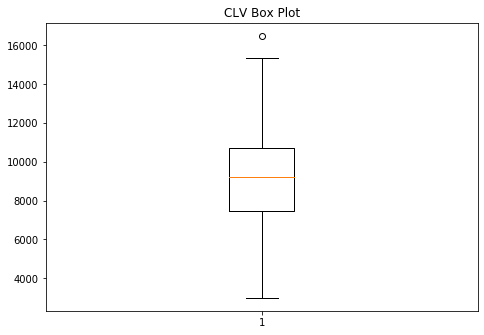

In [68]:
# Plot CLV using a box plot - shows min, max and median values
fig = plt.figure()

# Create axes
ax = fig.add_axes([0,0,1,1])

# Create boxplot
bp = ax.boxplot(clv_data)
plt.title('CLV Box Plot')

plt.show()